In [8]:
import tweepy
import json
from pymongo import MongoClient
from collections import Counter
import logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import community
import seaborn as sns
from fastprogress import master_bar, progress_bar

#Logger
logging.basicConfig(filename='Multigraph.log', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p', level=logging.INFO)
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logging.getLogger().addHandler(ch)

In [9]:
#########################
# PREPARE MATRIX 1 DATA #
#########################


COMMUNITIES_LIST = ["VOX", "PP", "CS", "PSC", "COMUNS", "ERC", "CUP", "JXCAT"]
PARTY_NAMES_LIST = ['vox_es', 'populares', 'CiudadanosCs', 'socialistes_cat',
                    'EnComu_Podem','Esquerra_ERC', 'cupnacional', 'JuntsXCat']


def load_ideologial_positions(file_name):
    with open(file_name, 'r') as fp:
        positions = json.load(fp)       
    return positions

positions = load_ideologial_positions('../Cat-ideological_position_dict.json')
print(positions)

matrix1 = np.zeros((len(COMMUNITIES_LIST),len(COMMUNITIES_LIST)))

for A in COMMUNITIES_LIST:
    for B in COMMUNITIES_LIST:
        a = np.array(positions[PARTY_NAMES_LIST[COMMUNITIES_LIST.index(A)]])
        b = np.array(positions[PARTY_NAMES_LIST[COMMUNITIES_LIST.index(B)]])
        distance = np.linalg.norm(a-b)
        #https://en.wikipedia.org/wiki/Euclidean_distance
                
        matrix1[COMMUNITIES_LIST.index(A)][COMMUNITIES_LIST.index(B)] = distance
        
print(matrix1)

{'PSOE': [4.310048262560152, 2.8121461461804773], 'PODEMOS': [4.045784088417165, 4.902327996569042], 'EnComu_Podem': [4.051435511521283, 4.884041101896526], 'JuntsXCat': [1.783506249603776, 7.204070232950816], 'populares': [7.828901935966097, 3.3746689764510878], 'Esquerra_ERC': [2.519709546214207, 5.698164779174088], 'CiudadanosCs': [8.031048463418713, 3.9263592371650944], 'vox_es': [9.218096441160444, 2.8371119060004513], 'socialistes_cat': [4.346360037869854, 2.8041375729395526], 'cupnacional': [2.699776066449226, 6.805447125757447]}
[[0.         1.48957342 1.61106879 4.871848   5.55736487 7.2838184
  7.63126365 8.62226515]
 [1.48957342 0.         0.58755882 3.52896644 4.06785654 5.79535647
  6.17075124 7.15619473]
 [1.61106879 0.58755882 0.         3.85179312 4.09322291 5.78914083
  6.05901085 7.05515224]
 [4.871848   3.52896644 3.85179312 0.         2.10070921 3.42228659
  4.32685994 5.09191781]
 [5.55736487 4.06785654 4.09322291 2.10070921 0.         1.73464169
  2.34920931 3.244

In [10]:
#########################
# PREPARE MATRIX 2 DATA #
#########################

########################
#          CEO         #
########################

CEO_ideological_position ={}

CEO_ideological_position['CiudadanosCs'] = [5.50, 4.38]
CEO_ideological_position['JuntsXCat'] = [4.15, 8.77]
CEO_ideological_position['Esquerra_ERC'] = [3.37, 7.71]
CEO_ideological_position['socialistes_cat'] = [4.08, 4.75]
CEO_ideological_position['EnComu_Podem'] = [2.95, 4.80]
CEO_ideological_position['cupnacional'] = [2.11, 8.02]
CEO_ideological_position['populares'] = [6.42, 4.56]
CEO_ideological_position['vox_es'] = [6.84, 4.00]

print(CEO_ideological_position)

COMMUNITIES_LIST = ["VOX", "PP", "CS", "PSC", "COMUNS", "ERC", "CUP", "JXCAT"]
PARTY_NAMES_LIST = ['vox_es', 'populares', 'CiudadanosCs', 'socialistes_cat',
                    'EnComu_Podem','Esquerra_ERC', 'cupnacional', 'JuntsXCat']


matrix2 = np.zeros((len(COMMUNITIES_LIST),len(COMMUNITIES_LIST)))

for A in COMMUNITIES_LIST:
    for B in COMMUNITIES_LIST:
        a = np.array(CEO_ideological_position[PARTY_NAMES_LIST[COMMUNITIES_LIST.index(A)]])
        b = np.array(CEO_ideological_position[PARTY_NAMES_LIST[COMMUNITIES_LIST.index(B)]])
        distance = np.linalg.norm(a-b)
        #https://en.wikipedia.org/wiki/Euclidean_distance
                
        matrix2[COMMUNITIES_LIST.index(A)][COMMUNITIES_LIST.index(B)] = distance #TO:DO: Revise SCALING!!
        
print(matrix2)  

{'CiudadanosCs': [5.5, 4.38], 'JuntsXCat': [4.15, 8.77], 'Esquerra_ERC': [3.37, 7.71], 'socialistes_cat': [4.08, 4.75], 'EnComu_Podem': [2.95, 4.8], 'cupnacional': [2.11, 8.02], 'populares': [6.42, 4.56], 'vox_es': [6.84, 4.0]}
[[0.         0.7        1.39283883 2.86008741 3.97141033 5.0798622
  6.20751963 5.47622132]
 [0.7        0.         0.93744333 2.347701   3.47828981 4.38463225
  5.52699738 4.7829907 ]
 [1.39283883 0.93744333 0.         1.46741269 2.58435679 3.95294827
  4.97410293 4.5928858 ]
 [2.86008741 2.347701   1.46741269 0.         1.13110565 3.04396123
  3.81756467 4.02060941]
 [3.97141033 3.47828981 2.58435679 1.13110565 0.         2.94015306
  3.32776201 4.14739677]
 [5.0798622  4.38463225 3.95294827 3.04396123 2.94015306 0.
  1.29757466 1.31605471]
 [6.20751963 5.52699738 4.97410293 3.81756467 3.32776201 1.29757466
  0.         2.17349948]
 [5.47622132 4.7829907  4.5928858  4.02060941 4.14739677 1.31605471
  2.17349948 0.        ]]


In [11]:
########################
# PREPARE MATRIX 3 DATA #
########################

#############################################
#          MANIFESTO RESEARCH GROUP         #
#############################################

Manifesto_ideological_position ={}

Manifesto_ideological_position['CS'] = [6.04, 4.39]
Manifesto_ideological_position['JXCAT'] = [4.94, 6.29]
Manifesto_ideological_position['ERC'] = [2.94, 7.11]
Manifesto_ideological_position['PSC'] = [5.31, 5.36]
Manifesto_ideological_position['COMUNS'] = [2.70, 5.78]
Manifesto_ideological_position['CUP'] = [1.51, 6.84]
Manifesto_ideological_position['PP'] = [9.57, 4.67]
Manifesto_ideological_position['VOX'] = [8.33, 1.32]

print(Manifesto_ideological_position)

COMMUNITIES_LIST = ["VOX", "PP", "CS", "PSC", "COMUNS", "ERC", "CUP", "JXCAT"]


matrix3 = np.zeros((len(COMMUNITIES_LIST),len(COMMUNITIES_LIST)))

for A in COMMUNITIES_LIST:
    for B in COMMUNITIES_LIST:
        a = np.array(Manifesto_ideological_position[A])
        b = np.array(Manifesto_ideological_position[B])
        distance = np.linalg.norm(a-b)
        #https://en.wikipedia.org/wiki/Euclidean_distance
                
        matrix3[COMMUNITIES_LIST.index(A)][COMMUNITIES_LIST.index(B)] = distance #TO:DO: Revise SCALING!!
        
print(matrix3)  

{'CS': [6.04, 4.39], 'JXCAT': [4.94, 6.29], 'ERC': [2.94, 7.11], 'PSC': [5.31, 5.36], 'COMUNS': [2.7, 5.78], 'CUP': [1.51, 6.84], 'PP': [9.57, 4.67], 'VOX': [8.33, 1.32]}
[[0.         3.57212822 3.83001305 5.04400634 7.18251349 7.91051199
  8.77398427 6.01606183]
 [3.57212822 0.         3.5410874  4.31551851 6.95909477 7.06473637
  8.34700545 4.9052319 ]
 [3.83001305 3.5410874  0.         1.21400165 3.61769263 4.12412415
  5.15008738 2.19544984]
 [5.04400634 4.31551851 1.21400165 0.         2.64357712 2.94608214
  4.07803874 1.0008996 ]
 [7.18251349 6.95909477 3.61769263 2.64357712 0.         1.35148067
  1.59364362 2.29732453]
 [7.91051199 7.06473637 4.12412415 2.94608214 1.35148067 0.
  1.4552663  2.1615735 ]
 [8.77398427 8.34700545 5.15008738 4.07803874 1.59364362 1.4552663
  0.         3.47381635]
 [6.01606183 4.9052319  2.19544984 1.0008996  2.29732453 2.1615735
  3.47381635 0.        ]]


In [12]:
########################
# PREPARE MATRIX 4 DATA #
########################

########################
#          CHES         #
########################

CHES_ideological_position ={}

CHES_ideological_position['PODEMOS'] = [1.93]
CHES_ideological_position['IU'] = [1.86]
CHES_ideological_position['MAS_PAIS'] = [2.73]
CHES_ideological_position['PSOE'] = [3.60]
CHES_ideological_position['CS'] = [7.20]
CHES_ideological_position['PP'] = [8.06]
CHES_ideological_position['VOX'] = [9.71]
CHES_ideological_position['ERC'] = [3.20]
CHES_ideological_position['PDECAT'] = [6.66]

print(CHES_ideological_position)

COMMUNITIES_LIST = ["VOX", "PP", "CS", "PSOE", "PODEMOS", "ERC", "CUP", "PDECAT"]


matrix4 = np.zeros((len(COMMUNITIES_LIST),len(COMMUNITIES_LIST)))

for A in COMMUNITIES_LIST:
    for B in COMMUNITIES_LIST:
        if(A != "CUP" and B != "CUP"):
            a = np.array(CHES_ideological_position[A])
            b = np.array(CHES_ideological_position[B])
            distance = np.linalg.norm(a-b)
            #https://en.wikipedia.org/wiki/Euclidean_distance

            matrix4[COMMUNITIES_LIST.index(A)][COMMUNITIES_LIST.index(B)] = distance #TO:DO: Revise SCALING!!
        else:
            matrix4[COMMUNITIES_LIST.index(A)][COMMUNITIES_LIST.index(B)] = 0
        
print(matrix4)  

{'PODEMOS': [1.93], 'IU': [1.86], 'MAS_PAIS': [2.73], 'PSOE': [3.6], 'CS': [7.2], 'PP': [8.06], 'VOX': [9.71], 'ERC': [3.2], 'PDECAT': [6.66]}
[[0.   1.65 2.51 6.11 7.78 6.51 0.   3.05]
 [1.65 0.   0.86 4.46 6.13 4.86 0.   1.4 ]
 [2.51 0.86 0.   3.6  5.27 4.   0.   0.54]
 [6.11 4.46 3.6  0.   1.67 0.4  0.   3.06]
 [7.78 6.13 5.27 1.67 0.   1.27 0.   4.73]
 [6.51 4.86 4.   0.4  1.27 0.   0.   3.46]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [3.05 1.4  0.54 3.06 4.73 3.46 0.   0.  ]]


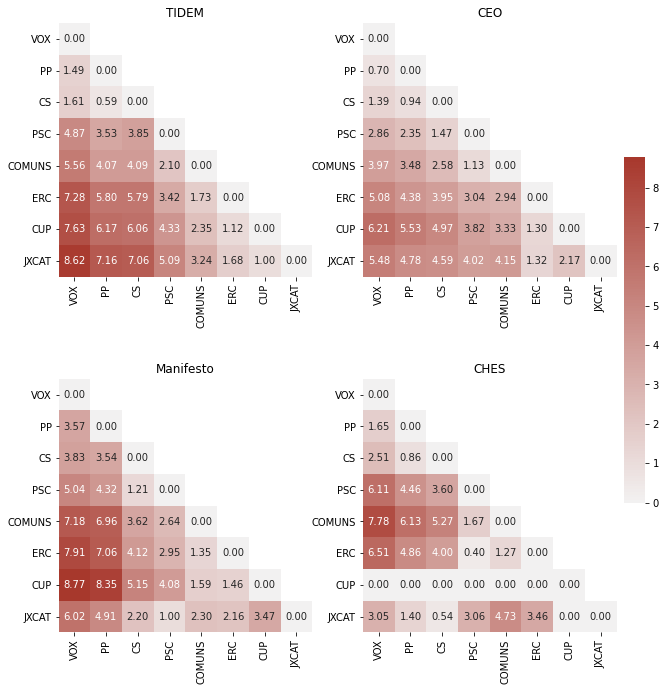

In [18]:
################################
# PLOT HEATMAP (NO REDUNDANCY) #
################################

COMMUNITIES_LIST = ["VOX", "PP", "CS", "PSC", "COMUNS", "ERC", "CUP", "JXCAT"]
matrix_df1 = pd.DataFrame(data=matrix1, index=COMMUNITIES_LIST, columns=COMMUNITIES_LIST)
matrix_df2 = pd.DataFrame(data=matrix2, index=COMMUNITIES_LIST, columns=COMMUNITIES_LIST)

COMMUNITIES_LIST = ["VOX", "PP", "CS", "PSC", "COMUNS", "ERC", "CUP", "JXCAT"]
matrix_df3 = pd.DataFrame(data=matrix3, index=COMMUNITIES_LIST, columns=COMMUNITIES_LIST)

COMMUNITIES_LIST = ["VOX", "PP", "CS", "PSC", "COMUNS", "ERC", "CUP", "JXCAT"]
matrix_df4 = pd.DataFrame(data=matrix4, index=COMMUNITIES_LIST, columns=COMMUNITIES_LIST)

# Calculate pairwise-correlation
m1 = matrix_df1.corr()
m2 = matrix_df2.corr()
m3 = matrix_df3.corr()
m4 = matrix_df4.corr()

# Create a mask
mask1 = np.triu(np.ones_like(m1, dtype=bool))
mask2 = np.triu(np.ones_like(m2, dtype=bool))
mask3 = np.triu(np.ones_like(m3, dtype=bool))
mask4 = np.triu(np.ones_like(m4, dtype=bool))

np.fill_diagonal(mask1, False)
np.fill_diagonal(mask2, False)
np.fill_diagonal(mask3, False)
np.fill_diagonal(mask4, False)

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

fig, axn = plt.subplots(2, 2, figsize = (10,12))
#fig, axn = plt.subplots(2, 2, figsize = (10,10), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

#Normalize axes
import matplotlib.colors as mcolors
values = np.hstack([d.values.ravel() for d in [matrix_df1, matrix_df2, matrix_df3, matrix_df4]])
norm = mcolors.Normalize(values.min(), values.max()) 

sns.heatmap(matrix_df1, mask=mask1, center=0, annot=True, fmt='.2f', square=True, cmap=cmap, norm=norm, ax=axn[0, 0], cbar=False)
sns.heatmap(matrix_df2, mask=mask2, center=0, annot=True, fmt='.2f', square=True, cmap=cmap, norm=norm, ax=axn[0, 1], cbar=False)
sns.heatmap(matrix_df3, mask=mask3, center=0, annot=True, fmt='.2f', square=True, cmap=cmap, norm=norm, ax=axn[1, 0], cbar=False)
sns.heatmap(matrix_df4, mask=mask3, center=0, annot=True, fmt='.2f', square=True, cmap=cmap, norm=norm, ax=axn[1, 1], cbar_ax=cbar_ax)

axn[0, 0].set_title("TIDEM")
axn[0, 1].set_title("CEO")
axn[1, 0].set_title("Manifesto")
axn[1, 1].set_title("CHES")

#plt.title("Ideological Distance (Method vs CES vs MANIFESTO vs CHES)")

#plt.savefig("CAT-MULTIPGRAPH.png")
plt.show()

In [19]:
matrix_df1

,VOX,PP,CS,PSC,COMUNS,ERC,CUP,JXCAT
VOX,0.000000,1.489573,1.611069,4.871848,5.557365,7.283818,7.631264,8.622265
PP,1.489573,0.000000,0.587559,3.528966,4.067857,5.795356,6.170751,7.156195
CS,1.611069,0.587559,0.000000,3.851793,4.093223,5.789141,6.059011,7.055152
PSC,4.871848,3.528966,3.851793,0.000000,2.100709,3.422287,4.326860,5.091918
COMUNS,5.557365,4.067857,4.093223,2.100709,0.000000,1.734642,2.349209,3.244386
ERC,7.283818,5.795356,5.789141,3.422287,1.734642,0.000000,1.121828,1.676230
CUP,7.631264,6.170751,6.059011,4.326860,2.349209,1.121828,0.000000,0.999225
JXCAT,8.622265,7.156195,7.055152,5.091918,3.244386,1.676230,0.999225,0.000000


In [20]:
matrix_df1.corrwith(matrix_df2)

VOX       0.979552
PP        0.969726
CS        0.945905
PSC       0.874837
COMUNS    0.756029
ERC       0.946776
CUP       0.969165
JXCAT     0.923066
dtype: float64

In [21]:
matrix_df1.corrwith(matrix_df3)

VOX       0.876738
PP        0.787357
CS        0.393590
PSC       0.510944
COMUNS    0.890765
ERC       0.949357
CUP       0.916209
JXCAT     0.648058
dtype: float64

In [22]:
matrix_df1.corrwith(matrix_df4)

VOX       0.371325
PP        0.270399
CS        0.160144
PSC       0.539333
COMUNS    0.920801
ERC       0.855659
CUP            NaN
JXCAT     0.202781
dtype: float64